In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = "/content/Population.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608,55811,56682,57475,58178,58782,...,102880,103594,104257,104874,105439,105962,106442,106585,106537,106445
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579,134169237,137835590,141630546,145605995,149742351,...,567892149,583651101,600008424,616377605,632746570,649757148,667242986,685112979,702977106,720859132
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466,8790140,8969047,9157465,9355514,9565147,...,31541209,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462,41128771
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290,99314028,101445032,103667517,105959979,108336203,...,387204553,397855507,408690375,419778384,431138704,442646825,454306063,466189102,478185907,490330870
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195,5441333,5521400,5599827,5673199,5736582,...,26147002,27128337,28127721,29154746,30208628,31273533,32353588,33428486,34503774,35588987


In [3]:
# Check for missing values
missing_values = data.isnull().sum()

# Display missing values
missing_values[missing_values > 0]

# Convert columns from 1960 to 2022 to numeric type
years = [str(year) for year in range(1960, 2023)]
data[years] = data[years].apply(pd.to_numeric, errors='coerce')


# Exploratory Data Analysis

## Total World Population Over Time :

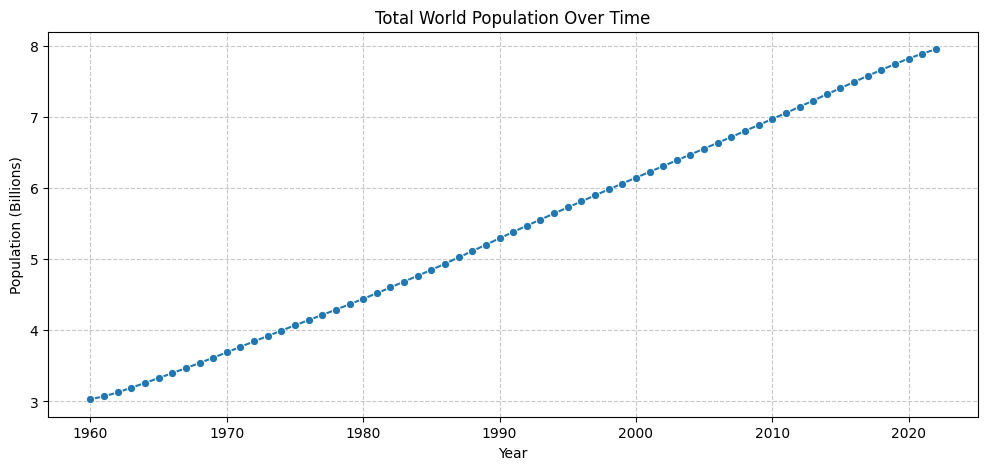

In [75]:
# Extract the 'World' row
world_data = data[data['Country Name'] == 'World'].iloc[0]

# Get years and corresponding population values
years = [int(col) for col in data.columns if col.isdigit()]
population = [world_data[str(year)] for year in years]

# Get years and corresponding population values
years = [int(col) for col in data.columns if col.isdigit()]
population = [world_data[str(year)] / 1e9 for year in years]  # Convert to billions

# Create the plot
plt.figure(figsize=(12, 5))
sns.lineplot(x=years, y=population , marker='o')
plt.title('Total World Population Over Time')
plt.xlabel('Year')
plt.ylabel('Population (Billions)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ticklabel_format(style='plain', axis='y')
plt.show()


## Population Comparison Between India and China :

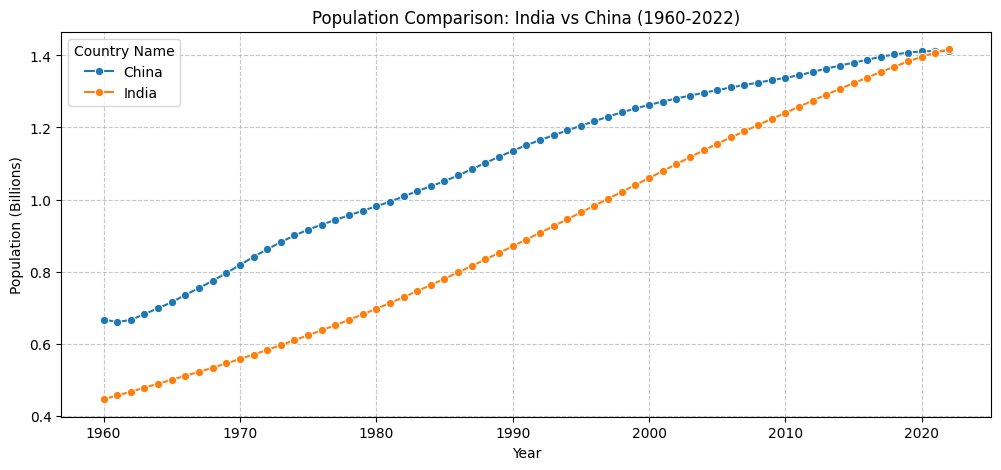

In [76]:
# India and China comparison
countries = ['India', 'China']
india_china_df = data[data['Country Name'].isin(countries)]

# Melt the dataframe for easier plotting
india_china_melted = pd.melt(india_china_df, id_vars=['Country Name'],
                             value_vars=[str(year) for year in range(1960, 2023)],
                             var_name='Year', value_name='Population')
india_china_melted['Year'] = pd.to_numeric(india_china_melted['Year'])
india_china_melted['Population'] = india_china_melted['Population'] / 1e9  # Convert to billions

# Plot India vs China
plt.figure(figsize=(12, 5))
sns.lineplot(data=india_china_melted, x='Year', y='Population', hue='Country Name', marker='o')
plt.title('Population Comparison: India vs China (1960-2022)')
plt.ylabel('Population (Billions)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Population Growth Over Time for Selected Countries :

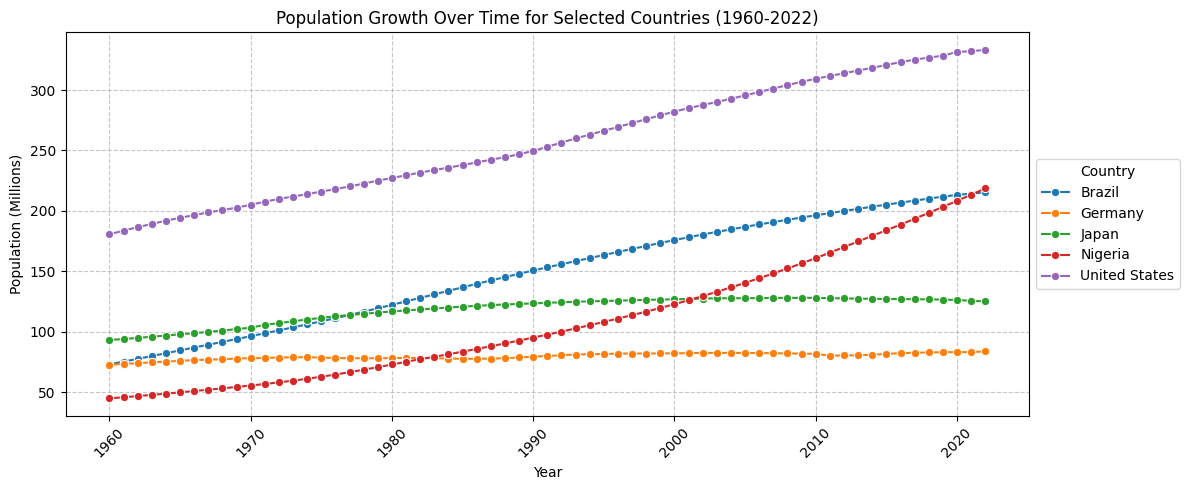

In [77]:
# Selected countries
selected_countries = ['United States', 'Brazil', 'Nigeria', 'Japan', 'Germany']

# Filter the dataframe for selected countries
selected_df = data[data['Country Name'].isin(selected_countries)]

# Melt the dataframe for easier plotting
melted_df = pd.melt(selected_df, id_vars=['Country Name'],
                    value_vars=[str(year) for year in range(1960, 2023)],
                    var_name='Year', value_name='Population')

# Convert Year to numeric and Population to millions
melted_df['Year'] = pd.to_numeric(melted_df['Year'])
melted_df['Population'] = melted_df['Population'] / 1e6  # Convert to millions

# Create the plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=melted_df, x='Year', y='Population', hue='Country Name' , marker='o')

# Customize the plot
plt.title('Population Growth Over Time for Selected Countries (1960-2022)')
plt.xlabel('Year')
plt.ylabel('Population (Millions)')
plt.xticks(range(1960, 2023, 10), rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Country', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

## Pie Chart of Population Proportion in 2022 :

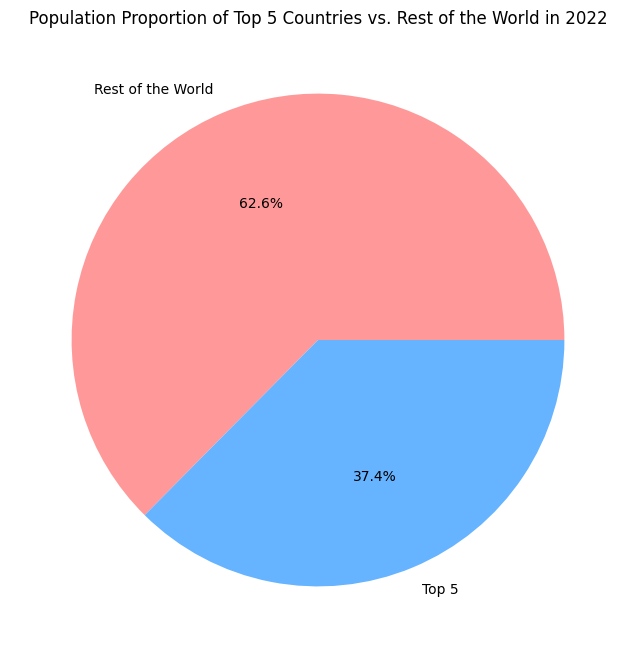

In [24]:
# Identify top 5 countries by population in 2022
top_5_2022 = data[data['Year'] == 2022].nlargest(5, 'Population')['Country Name']

# Create a column to categorize top 5 vs. rest of the world
data['Category'] = data['Country Name'].apply(lambda x: 'Top 5' if x in top_5_2022.values else 'Rest of the World')

# Aggregate data by category for 2022
category_data_2022 = data[data['Year'] == 2022].groupby('Category')['Population'].sum().reset_index()

# Visualization: Pie Chart of Population Proportion in 2022
plt.figure(figsize=(10, 8))
plt.pie(category_data_2022['Population'], labels=category_data_2022['Category'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Population Proportion of Top 5 Countries vs. Rest of the World in 2022')
plt.show()


## Yearly Population Growth Rate by Region :

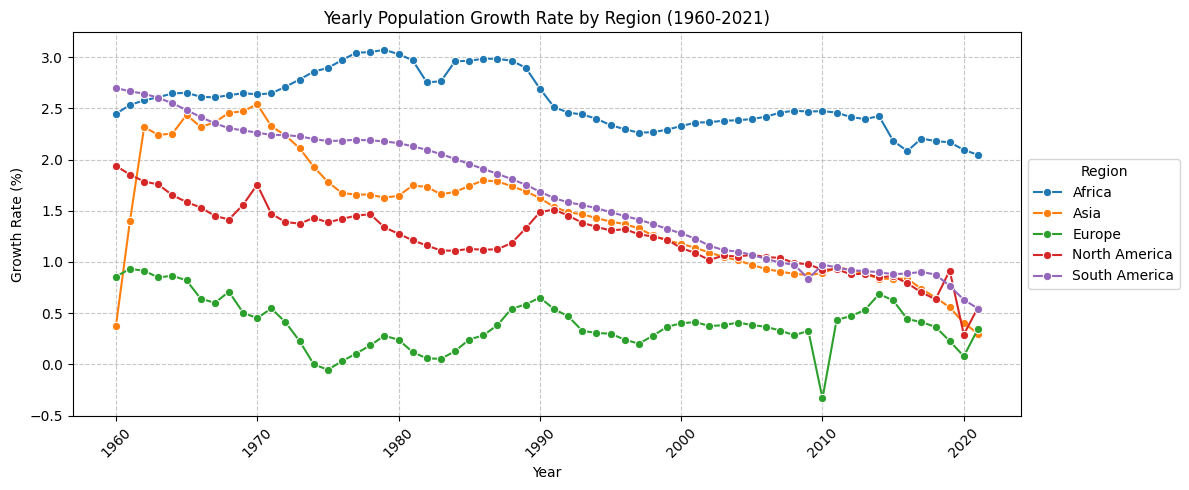

In [78]:
region_dict = {
    'Africa': ['Nigeria', 'South Africa', 'Kenya'],
    'Asia': ['China', 'India', 'Japan'],
    'Europe': ['Germany', 'United Kingdom', 'France'],
    'North America': ['United States', 'Canada', 'Mexico'],
    'South America': ['Brazil', 'Argentina', 'Chile']
}

# Function to calculate growth rate
def calculate_growth_rate(row):
    return (row.iloc[-1] / row.iloc[0]) ** (1 / (len(row) - 1)) - 1

# Initialize a dictionary to store growth rates
growth_rates = {region: [] for region in region_dict.keys()}

# Calculate growth rates for each region
for region, countries in region_dict.items():
    region_df = data[data['Country Name'].isin(countries)]
    years = [str(year) for year in range(1960, 2023)]

    for year in range(1960, 2022):  # We'll calculate growth rate up to 2021
        start_year = str(year)
        end_year = str(year + 1)
        growth_rate = calculate_growth_rate(region_df[[start_year, end_year]].mean())
        growth_rates[region].append((year, growth_rate))

# Prepare data for plotting
plot_data = []
for region, rates in growth_rates.items():
    for year, rate in rates:
        plot_data.append({'Region': region, 'Year': year, 'Growth Rate': rate * 100})  # Convert to percentage

plot_df = pd.DataFrame(plot_data)

# Create the plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=plot_df, x='Year', y='Growth Rate', hue='Region' , marker='o')

# Customize the plot
plt.title('Yearly Population Growth Rate by Region (1960-2021)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.xticks(range(1960, 2022, 10), rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Region', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

## Population Trends by Income Level :

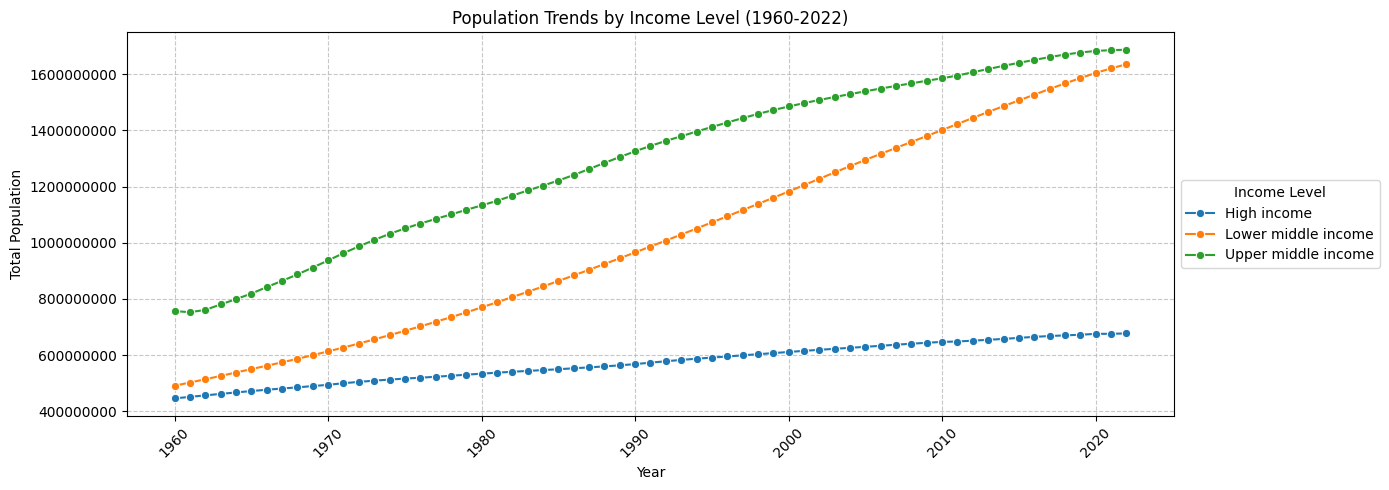

In [73]:
income_level_dict = {
    'United States': 'High income',
    'Brazil': 'Upper middle income',
    'Nigeria': 'Lower middle income',
    'Japan': 'High income',
    'Germany': 'High income',
    'China': 'Upper middle income',
    'India': 'Lower middle income',
    'South Africa': 'Upper middle income',
    'United Kingdom': 'High income',
    'France': 'High income'
}

# Melt the dataframe to long format
years = [str(year) for year in range(1960, 2023)]
data_long = data.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                    value_vars=years,
                    var_name='Year',
                    value_name='Population')

# Convert Year to integer and Population to float
data_long['Year'] = data_long['Year'].astype(int)
data_long['Population'] = data_long['Population'].astype(float)

# Add income level data to the dataset
data_long['Income Level'] = data_long['Country Name'].map(income_level_dict)

# Filter out rows where Income Level is NaN
data_long = data_long.dropna(subset=['Income Level'])

# Aggregate data by income level
income_level_data = data_long.groupby(['Year', 'Income Level'])['Population'].sum().reset_index()

# Visualization: Population Trends by Income Level
plt.figure(figsize=(14, 5))
sns.lineplot(data=income_level_data, x='Year', y='Population', hue='Income Level', marker='o')
plt.title('Population Trends by Income Level (1960-2022)')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.xticks(range(1960, 2023, 10), rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Income Level', loc='center left', bbox_to_anchor=(1, 0.5))
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()


## Top 10 Countries with Highest Population Growth Rates:

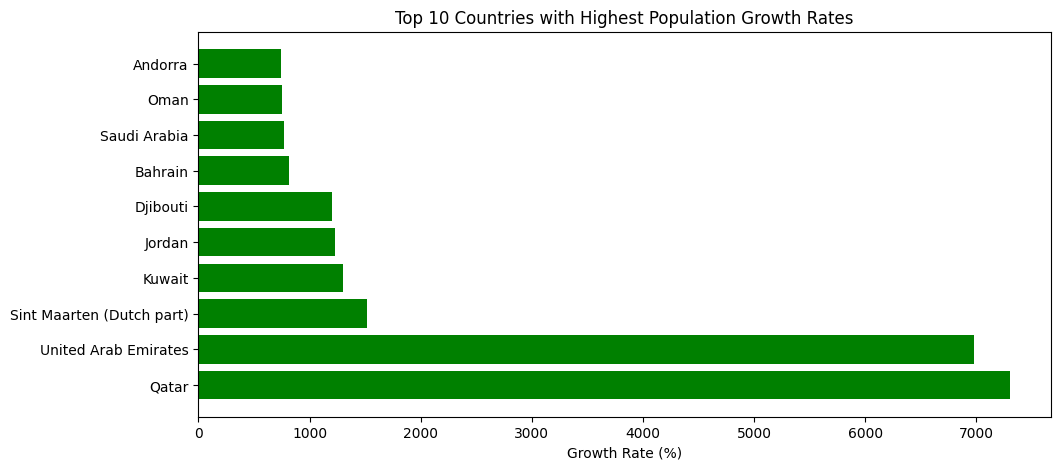

In [51]:
data['Growth Rate'] = (data['2022'] - data['1960']) / data['1960'] * 100


# Top 10 countries with the highest growth rates
top_growth = data.nlargest(10, 'Growth Rate')
bottom_growth = data.nsmallest(10, 'Growth Rate')

plt.figure(figsize=(11, 5))
plt.barh(top_growth['Country Name'], top_growth['Growth Rate'], color='green')
plt.xlabel('Growth Rate (%)')
plt.title('Top 10 Countries with Highest Population Growth Rates')
plt.show()

## Top 10 Countries with Lowest Population Growth Rates :

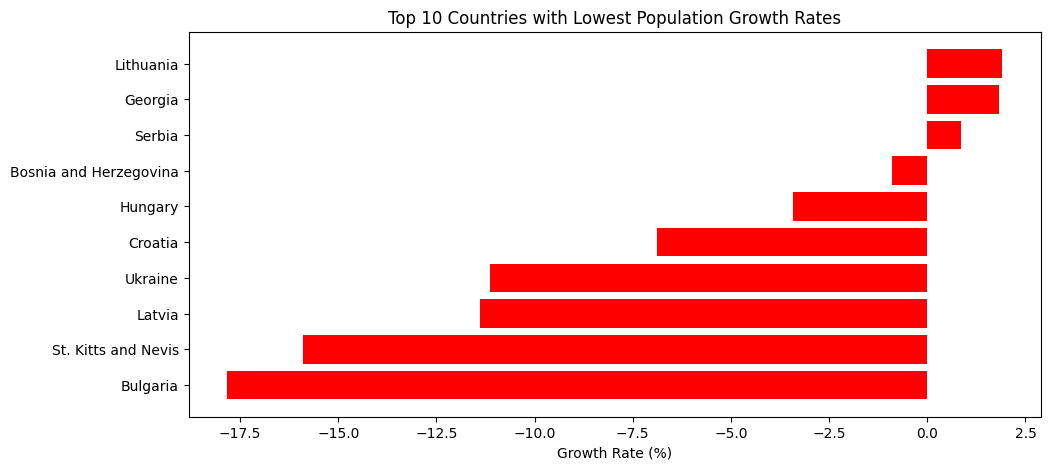

In [52]:
plt.figure(figsize=(11, 5))
plt.barh(bottom_growth['Country Name'], bottom_growth['Growth Rate'], color='red')
plt.xlabel('Growth Rate (%)')
plt.title('Top 10 Countries with Lowest Population Growth Rates')
plt.show()